In [ ]:
from IPython.display import display
import IPython
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import sklearn as skl
%matplotlib notebook
%matplotlib inline
import tensorflow as tf
!pip install mglearn
import mglearn as mglearn
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from mpl_toolkits.mplot3d import Axes3D

     |████████████████████████████████| 542kB 2.8MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=538ace33580f63d744802f659469952a8de07be8776e7904ed411aa6582e3bcb
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [ ]:
def sum_squares_error(y,t): #최소제곱법
    return 0.5*np.sum((y-t)**2)

def cross_entropy_error(y,t):
    delta =1e-7 #졸라 작은값
    return -np.sum(t*np.log(y+delta))#졸라 작은 값을 더해줌으로써 로그 값이 무한대로 가지 않게 하기 위함.

In [ ]:
t=np.array([0,0,1,0,0,0,0,0,0,0])
t_reshape=t.reshape(-1,1)

y1=np.array([0.1, 0.05, 0.1, 0, 0.05, 0.1, 0, 0.6, 0,0])
y2=np.array([0.1,0.05,0.6,0,0,0.05,0.1,0,0.1,0])
print("np.shape(y1):{}".format(np.shape(y1)))
print("y1.ndim:{}".format(y1.ndim))
print("y1.size:{}\n".format(y1.size))
print(y1.reshape(1,y1.size))
print("np.shape(y1.reshape(1,y1.size):{}\n".format(np.shape(y1.reshape(1,y1.size))))
print(t_reshape)
print("np.shape(t_reshape):{}".format(np.shape(t_reshape)))
print("t_reshape.ndim:{}\n".format(t_reshape.ndim))
print("t_reshape.size:{}\n".format(t_reshape.size))
print(np.sum(y1))
print(np.sum(y2))
print("[{0:.2f},{1:.2f}]".format(sum_squares_error(y1,t),sum_squares_error(y2,t)))
print("[{0},{1}]".format(cross_entropy_error(y1,t),cross_entropy_error(y2,t)))

np.shape(y1):(10,)
y1.ndim:1
y1.size:10

[[0.1  0.05 0.1  0.   0.05 0.1  0.   0.6  0.   0.  ]]
np.shape(y1.reshape(1,y1.size):(1, 10)

[[0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
np.shape(t_reshape):(10, 1)
t_reshape.ndim:2

t_reshape.size:10

1.0
1.0
[0.60,0.10]
[2.302584092994546,0.510825457099338]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/My Drive/Colab Notebooks/Bottom Deeplearning/dataset") #디렉토리 지정하기 거기서 파일 가져오는 거고

In [ ]:
import mnist
from mnist import load_mnist

In [ ]:
(x_train, t_train), (x_test, t_test) = load_mnist(one_hot_label=False, normalize=False)

In [ ]:
train_size=x_train.shape[0] #6000
batch_size= 100
batch_mask = np.random.choice(train_size, batch_size)

In [ ]:
def cross_entropy_single(y,t):
  if y.ndim==1: #(N,)인 경우 ndim=1임
    t=t.reshape(1,t.size)
    y=y.reshape(1,y.size)

    batch_size=y.shape[0]
    return -np.sum(t*np.log(y+1e-7))/batch_size

In [ ]:
def cross_entropy_batch(y,t):
  if y.ndim==1:
    t=t.reshape(1,t.size)
    y=y.reshape(1,y.size) #y는(1,K) 형태인데 ()

    batch_size=y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size),t]+1e-7))/batch_size

In [ ]:
def numerical_diff(f,x):
  h=1e-4
  return (f(x+h)-f(x-h)) / (2*h)

def F(x):
    return x**2 + x 

#def myfunc(n):
# return lambda a : a**n

#mydoubler = myfunc(2) =>2가 n

#
#print(mydoubler(11)) 이결과는 11^2가 나와. 11은 a가 되는거야

def tangent_line(f, a):
    d = numerical_diff(f, a) #f'(x)가 나오겠지
    print(d)
    y = f(a) - d*a #f(x)-xf'(x)
    return lambda x: d*x + y #t자리를 남겨두겠다?

#tf = tangent_line(function_1, 5) => (5,f(5),f'(5)를 모두구해놓고)
#y2 = tf(x) 위에걸 이용해서 접선의 방정식을 만드는거야!! 미쳤어

40.999999999655756
60.999999999467036


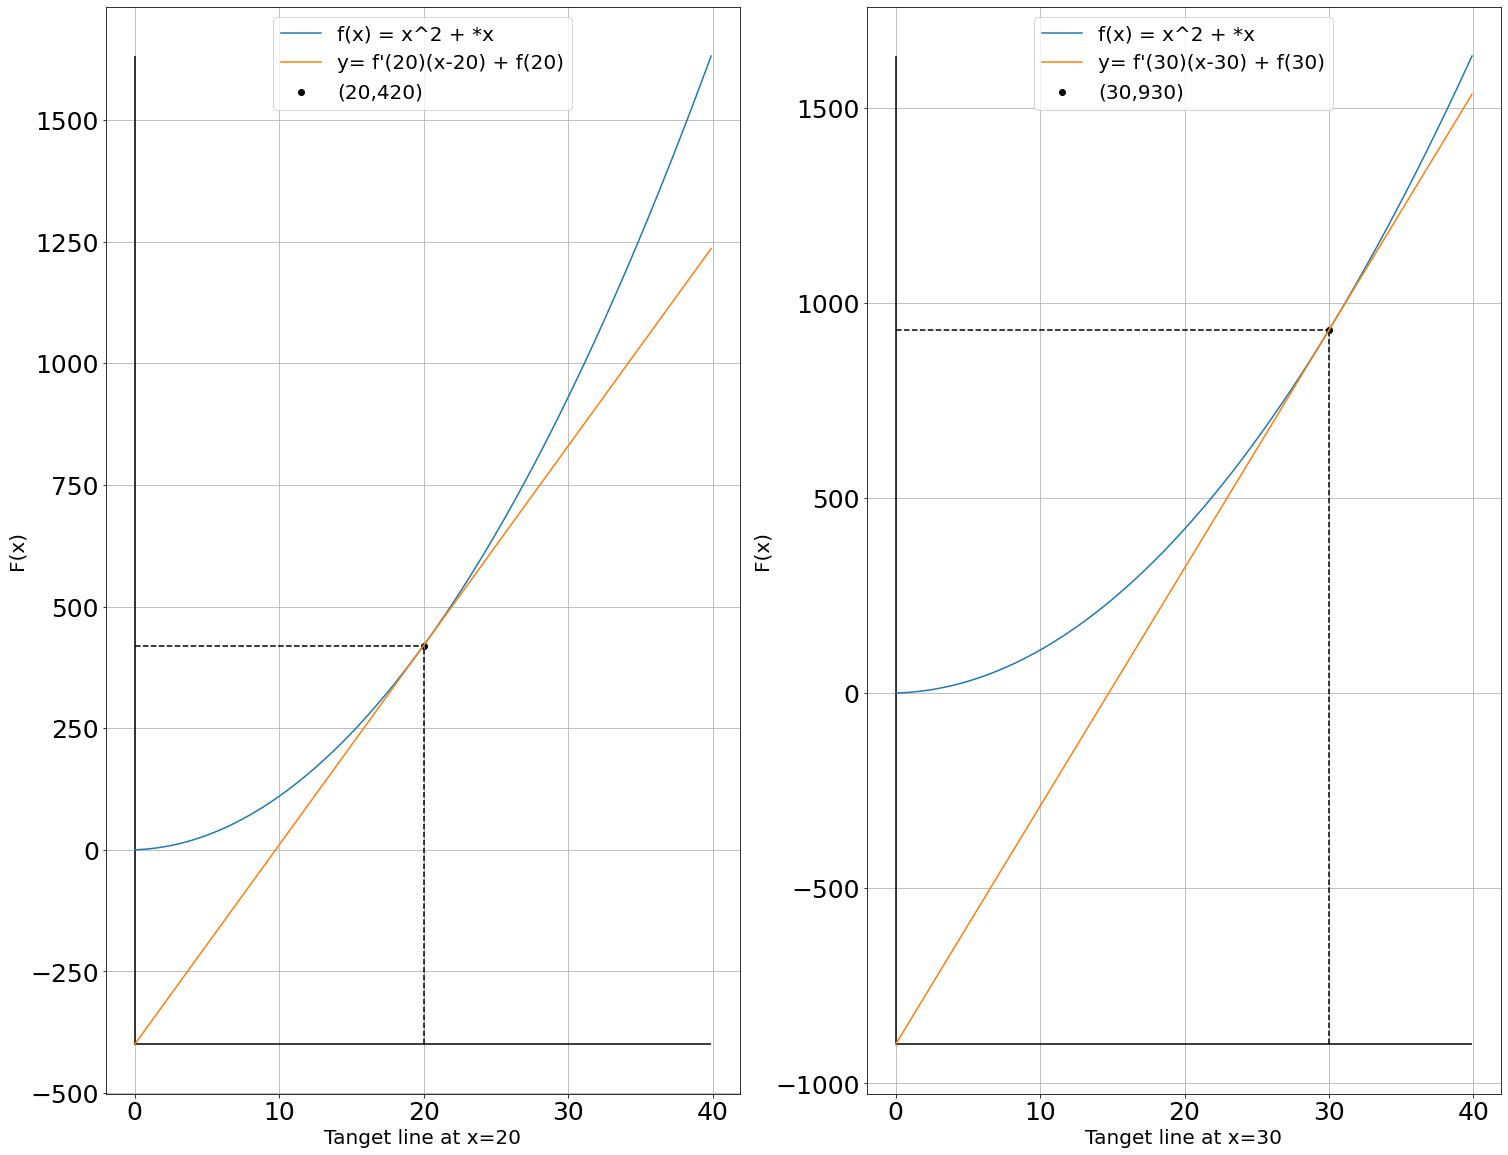

In [ ]:
x = np.arange(0.0, 40.0, 0.1)
y = F(x)

fig, axes = plt.subplots(1, 2, figsize=(25, 20))
#plt.figure(figsize=[10,8]) #figure 사이즈 먼저 정해주고 그 다음하나씩

for a, ax in zip([20,30], axes):
  f = tangent_line(F, a)
  y=f(x)
  ax.plot(x, F(x),label="f(x) = x^2 + *x")
  ax.plot(x, y,label="y= f'({0})(x-{1}) + f({2})".format(a,a,a))
  ax.set_xlabel("Tanget line at x={}".format(a),fontsize=20)
  ax.set_ylabel("F(x)",fontsize=20)
  ax.tick_params(labelsize=25)
  ax.vlines(min(x),ymin=min(np.min(F(x)),np.min(y)),ymax=max(np.max(F(x)),np.max(y)),linestyles='-')
  ax.hlines(min(np.min(F(x)),np.min(y)),xmin=np.min(x),xmax=np.max(x),linestyles='-')
  ax.scatter(a,F(a),marker="o",label="({0},{1})".format(a,F(a)),color="black")
  ax.hlines(y=F(a), xmin=np.min(x), xmax=a,linestyles="--")
  ax.vlines(x=a, ymin=min(np.min(F(x)),np.min(y)), ymax=F(a), linestyles="--") #이거 대박이군 ㅋㅋㅋㅋㅋ 좋군
  ax.legend(loc=9,fontsize=20)
  ax.grid()




In [ ]:
#편미분 미분 구하기

def partial_diff(f,x):
  h=1e-4
  grad=np.zeros_like(x)

  for i in range(x.size):
    a=x[i]
    xplus=a+h
    xminus=a-h
    grad[i]=(f(xplus)-f(xminus))/2*h
  
  return grad #각 x의 편미분 값이 나옴

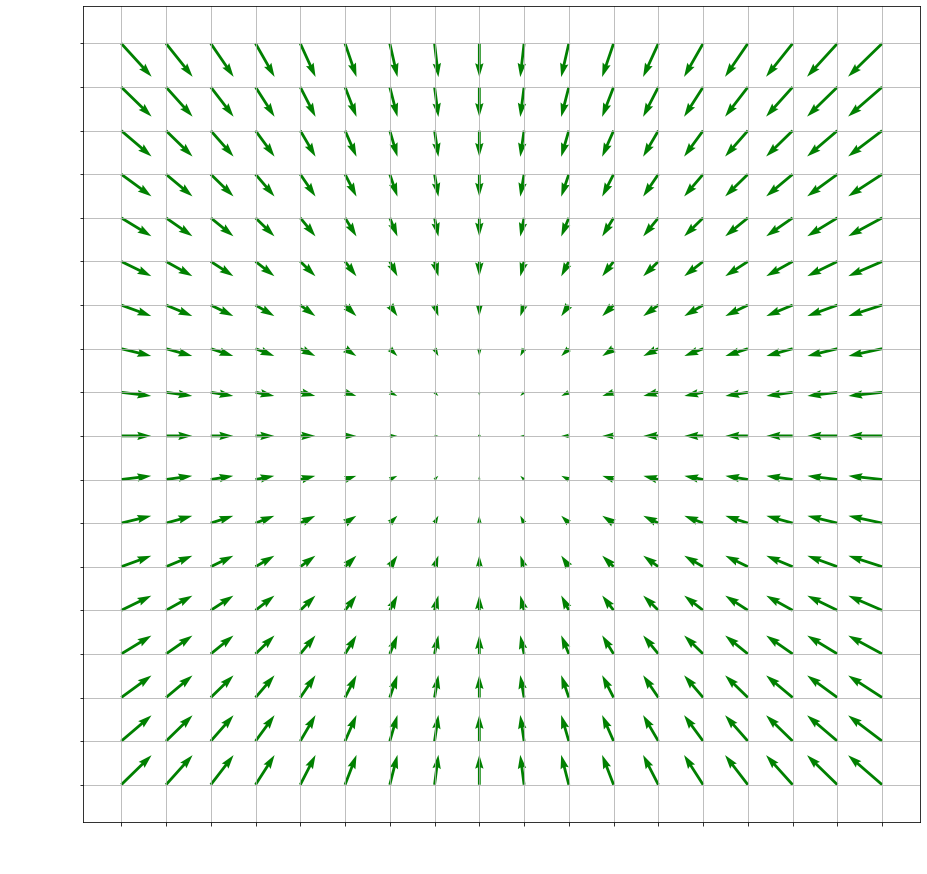

In [ ]:
def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for i in range(x.size):
        tmp_val = x[i]
        
        # f(x+h) 계산
        x[i] = float(tmp_val) + h
        fplus = f(x)
        
        # f(x-h) 계산
        x[i] = tmp_val - h 
        fminus = f(x) 
        
        grad[i] = (fplus - fminus) / (2*h)
        x[i] = tmp_val # 값 복원
        
    return grad

def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1) #첫번째 좌표값들만 더함


def tangent_line(f, a):
    d = numerical_diff(f, a) #f'(x)가 나오겠지
    print(d)
    y = f(a) - d*a #f(x)-xf'(x)
    return lambda x: d*x + y #t자리를 남겨두겠다?

     
if __name__ == '__main__': #여기서부터가 시작이지
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
#print(np.shape(X)) = (18,18)
#print(X) #[[-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25],[...],[],..,]
    X = X.flatten()#
    Y = Y.flatten()
#print(np.shape(X)) #(324,)
#print(X) #=[-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25  -2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0. ....]
    grad = numerical_gradient(function_2, np.array([X, Y]) )
#np.shape(np.array([X,Y])) #(2,324)
    plt.figure(figsize=[15,15])
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="green")#,headwidth=10,scale=40,color="#444444")
    plt.xticks(np.arange(-2, 2.5, 0.25),fontsize=15,color="white")
    plt.yticks(np.arange(-2, 2.5, 0.25),fontsize=15,color="white")
    plt.xlabel('x0',fontsize=20,color="white")
    plt.ylabel('x1',fontsize=20,color="white")
    plt.grid()
    plt.draw()
    plt.show()

In [ ]:
nx, ny = (3, 2)
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
xv, yv = np.meshgrid(x, y)
yv

array([[0., 0., 0.],
       [1., 1., 1.]])